In [56]:
from plotnine import *
import pandas as pd 
import numpy as np

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents

def toTfidf(text):
    vectorizer = TfidfVectorizer(stop_words = "english")
    # tokenize and build vocab
    return (vectorizer.fit_transform(text))

In [ ]:
youtube_data = pd.read_csv("video_data_final.csv", encoding = "ISO-8859-1")

In [86]:
allTitles = list(youtube_data['title'])
tfidf = toTfidf(allTitles)

C:\Users\Asra\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1015: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


  (0, 28358)	0.3285788985297511
  (0, 20542)	0.2991159733698071
  (0, 28161)	0.1716017991609054
  (0, 60392)	0.3469500842250931
  (0, 22930)	0.39591724042218573
  (0, 61235)	0.36509854950408227
  (0, 1921)	0.28103325634402354
  (0, 41952)	0.35169375576599
  (0, 42603)	0.4000355013837302
0.4000355013837302


In [51]:
def toFeatures(text):
    result = []
    for word in text.split():
        if (word in tfidf):
            result.append(tfidf[word])
        else:
            print(word)
    return result

In [80]:
def getFeatures(tfidf, tfidf_type):
    result = []
    for i in range(tfidf.shape[0]):
        vector = tfidf[i]
        if (tfidf_type == 'min'):
            result.append(np.min(vector))
        elif (tfidf_type == 'max'):
            result.append(np.max(vector))
        else:
            #average
            result.append(np.mean(vector))
    return pd.Series(result)

In [87]:
youtube_data['mean_title'] = getFeatures(tfidf, 'mean')

In [81]:
youtube_data['max_title'] = getFeatures(tfidf, 'max')

In [88]:
youtube_data['min_title'] = getFeatures(tfidf, 'min')

In [90]:
top_topics = ['Game', 'Vehicle', 'Video game', 'Concert', 'Car', 'Animation', 'Musician', 'Dance', 'Music video', 'Motorsport']

def numberCommon(topicsStr, top_topics):
    num = 0
    for word in top_topics:
        if word in topicsStr:
            num += 1
    return num
    

In [96]:
youtube_data['topics_features'] = youtube_data['topics'].apply(lambda topics : numberCommon(topics, top_topics))
youtube_data['game'] = youtube_data['topics'].apply(lambda topics : 1 if 'Game' in topics else 0)
youtube_data['vehicle'] = youtube_data['topics'].apply(lambda topics : 1 if 'Vehicle' in topics else 0)
youtube_data['video_game'] = youtube_data['topics'].apply(lambda topics : 1 if 'Video game' in topics else 0)
youtube_data['concert'] = youtube_data['topics'].apply(lambda topics : 1 if 'Concert' in topics else 0)
youtube_data['car'] = youtube_data['topics'].apply(lambda topics : 1 if 'Car' in topics else 0)

C:\Users\Asra\Anaconda3\lib\site-packages\plotnine\scales\scale.py:516: RuntimeWarning: divide by zero encountered in log10
  return self.trans.transform(x)
C:\Users\Asra\Anaconda3\lib\site-packages\plotnine\layer.py:363: UserWarning: stat_boxplot : Removed 17 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


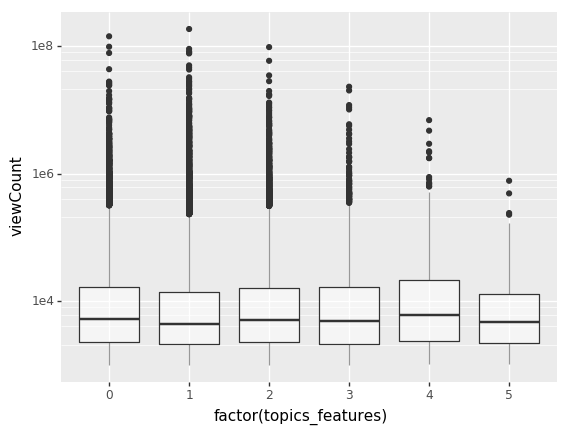

<ggplot: (-9223371953690768668)>

In [106]:
ggplot(youtube_data, aes(y = "viewCount", x = 'factor(topics_features)')) + \
    geom_boxplot(alpha = 0.5) + \
    scale_y_log10()

C:\Users\Asra\Anaconda3\lib\site-packages\plotnine\scales\scale.py:516: RuntimeWarning: divide by zero encountered in log10
  return self.trans.transform(x)
C:\Users\Asra\Anaconda3\lib\site-packages\plotnine\layer.py:363: UserWarning: stat_boxplot : Removed 17 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


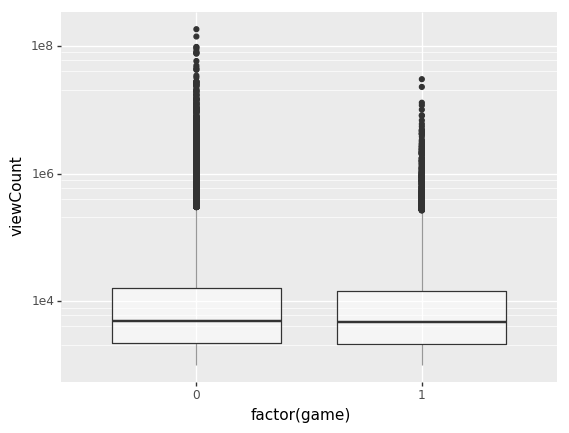

<ggplot: (-9223371953690839741)>

In [107]:
ggplot(youtube_data, aes(y = "viewCount", x = 'factor(game)')) + \
    geom_boxplot(alpha = 0.5) + \
    scale_y_log10()

C:\Users\Asra\Anaconda3\lib\site-packages\plotnine\scales\scale.py:516: RuntimeWarning: divide by zero encountered in log10
  return self.trans.transform(x)
C:\Users\Asra\Anaconda3\lib\site-packages\plotnine\layer.py:363: UserWarning: stat_boxplot : Removed 17 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


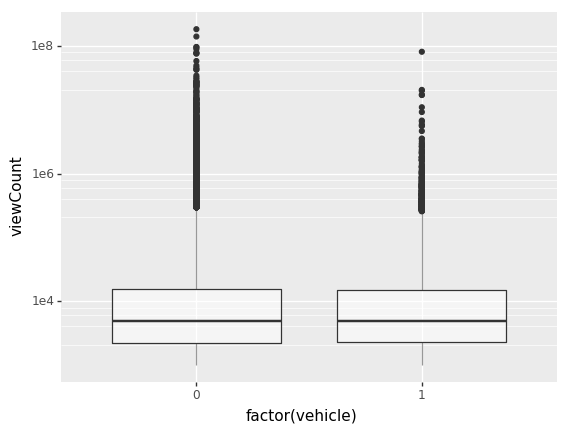

<ggplot: (83163969849)>

In [108]:
ggplot(youtube_data, aes(y = "viewCount", x = 'factor(vehicle)')) + \
    geom_boxplot(alpha = 0.5) + \
    scale_y_log10()

C:\Users\Asra\Anaconda3\lib\site-packages\plotnine\scales\scale.py:516: RuntimeWarning: divide by zero encountered in log10
  return self.trans.transform(x)
C:\Users\Asra\Anaconda3\lib\site-packages\plotnine\layer.py:363: UserWarning: stat_boxplot : Removed 17 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


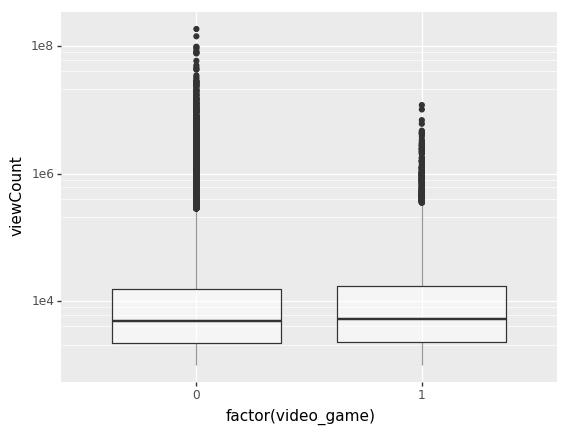

<ggplot: (83166307890)>

In [109]:
ggplot(youtube_data, aes(y = "viewCount", x = 'factor(video_game)')) + \
    geom_boxplot(alpha = 0.5) + \
    scale_y_log10()

C:\Users\Asra\Anaconda3\lib\site-packages\plotnine\scales\scale.py:516: RuntimeWarning: divide by zero encountered in log10
  return self.trans.transform(x)
C:\Users\Asra\Anaconda3\lib\site-packages\plotnine\layer.py:363: UserWarning: stat_boxplot : Removed 17 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


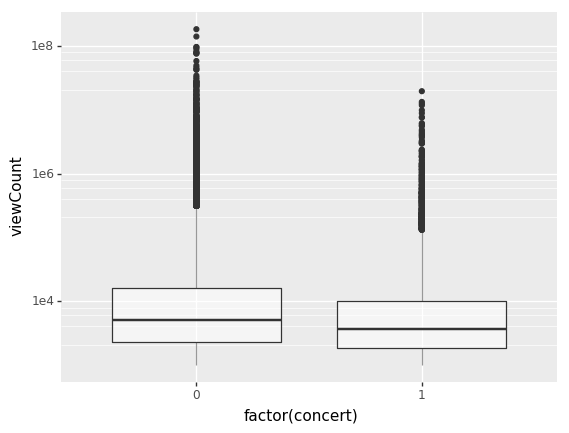

<ggplot: (-9223371953688424588)>

In [110]:
ggplot(youtube_data, aes(y = "viewCount", x = 'factor(concert)')) + \
    geom_boxplot(alpha = 0.5) + \
    scale_y_log10()

C:\Users\Asra\Anaconda3\lib\site-packages\plotnine\scales\scale.py:516: RuntimeWarning: divide by zero encountered in log10
  return self.trans.transform(x)
C:\Users\Asra\Anaconda3\lib\site-packages\plotnine\layer.py:363: UserWarning: stat_boxplot : Removed 17 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


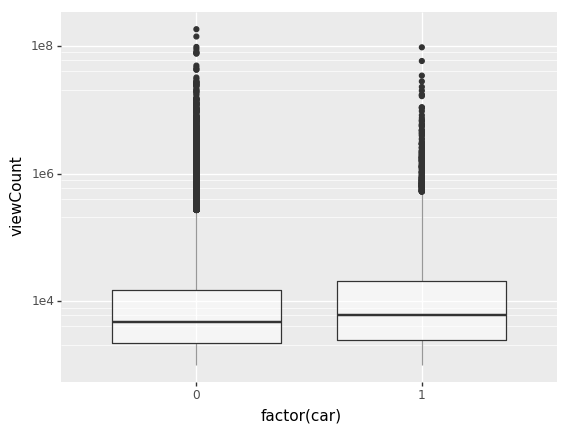

<ggplot: (83166199679)>

In [111]:
ggplot(youtube_data, aes(y = "viewCount", x = 'factor(car)')) + \
    geom_boxplot(alpha = 0.5) + \
    scale_y_log10()

C:\Users\Asra\Anaconda3\lib\site-packages\plotnine\scales\scale.py:516: RuntimeWarning: divide by zero encountered in log10
  return self.trans.transform(x)


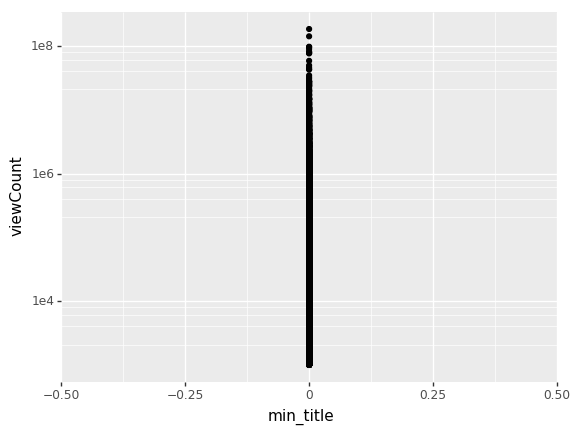

<ggplot: (83112716927)>

In [89]:
ggplot(youtube_data, aes(x = "min_title", y = "viewCount")) + \
    geom_point() + \
    scale_y_log10()

C:\Users\Asra\Anaconda3\lib\site-packages\plotnine\scales\scale.py:516: RuntimeWarning: divide by zero encountered in log10
  return self.trans.transform(x)


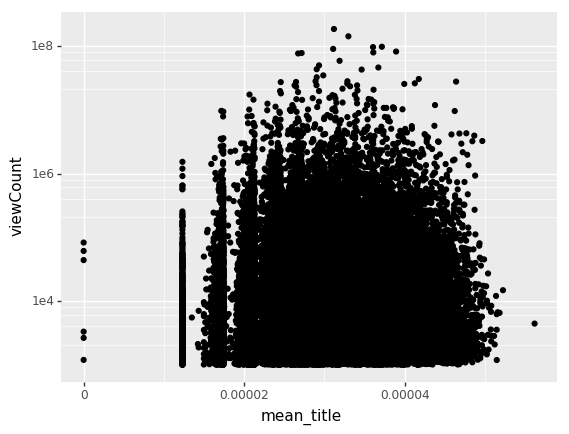

<ggplot: (-9223371953719387420)>

In [77]:
ggplot(youtube_data, aes(x = "mean_title", y = "viewCount")) + \
    geom_point() + \
    scale_y_log10()

C:\Users\Asra\Anaconda3\lib\site-packages\plotnine\scales\scale.py:516: RuntimeWarning: divide by zero encountered in log10
  return self.trans.transform(x)


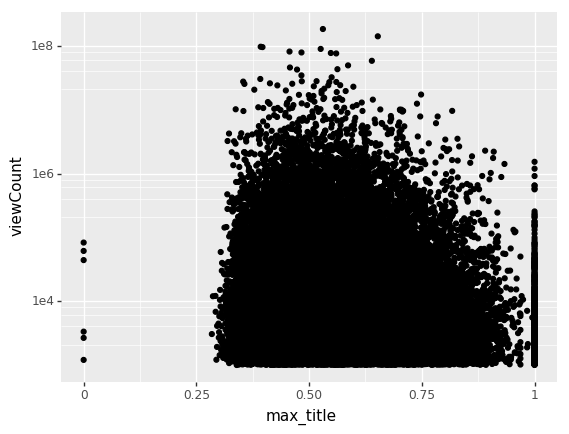

<ggplot: (83112716948)>

In [83]:
ggplot(youtube_data, aes(x = "max_title", y = "viewCount")) + \
    geom_point() + \
    scale_y_log10()

C:\Users\Asra\Anaconda3\lib\site-packages\plotnine\scales\scale.py:516: RuntimeWarning: divide by zero encountered in log10
  return self.trans.transform(x)


KeyboardInterrupt: 

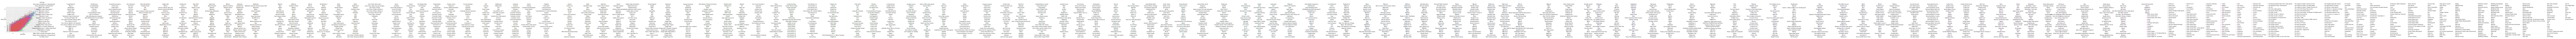

In [38]:
ggplot(youtube_data, aes(x = "likeCount", y = "viewCount",)) + \
    geom_point() + \
    scale_x_log10() + \
    scale_y_log10()

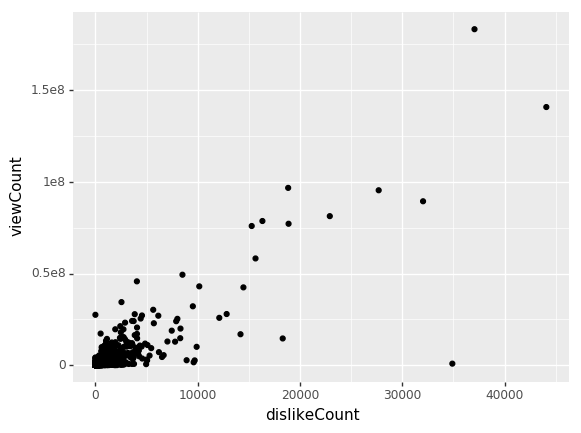

<ggplot: (83102807616)>

In [12]:
ggplot(youtube_data, aes(x = "dislikeCount", y = "viewCount")) + \
    geom_point() + \
    scale_x_log10() + \
    scale_y_log10() 

C:\Users\Asra\Anaconda3\lib\site-packages\plotnine\scales\scale.py:516: RuntimeWarning: divide by zero encountered in log10
  return self.trans.transform(x)


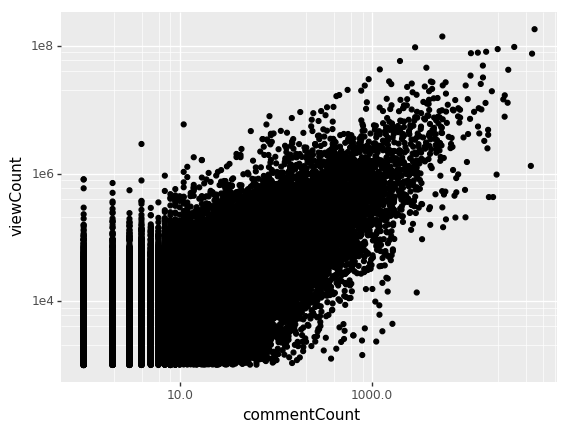

<ggplot: (-9223371953750141980)>

In [17]:
ggplot(youtube_data, aes(x = "commentCount", y = "viewCount")) + \
    geom_point() + \
    scale_x_log10() + \
    scale_y_log10()